# Explore here

In [1]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Definición de DataFrame de un csv

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Problema:

    Calcular válor de prima, para cada uno de los clientes de la aseguradora según datos físiologicos

In [3]:
# Clasificación de variables y valores faltantes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
def separar_columnas(df):
  
    categoricas = []
    numericas = []
    
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numericas.append(col)
        else:
            categoricas.append(col)
    
    return print(f'Categóricas: {categoricas}\nNúmericas: {numericas}')

separar_columnas(df)

Categóricas: ['sex', 'smoker', 'region']
Númericas: ['age', 'bmi', 'children', 'charges']


In [5]:
# Verificación de filas duplicadas

print(f'Filas Duplicadas: {df.duplicated().sum()}')

# Eliminación de filas duplicadas

df = df.drop_duplicates()
print(f'Filas Duplicadas tras eliminación: {df.duplicated().sum()}')

df

Filas Duplicadas: 1
Filas Duplicadas tras eliminación: 0


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


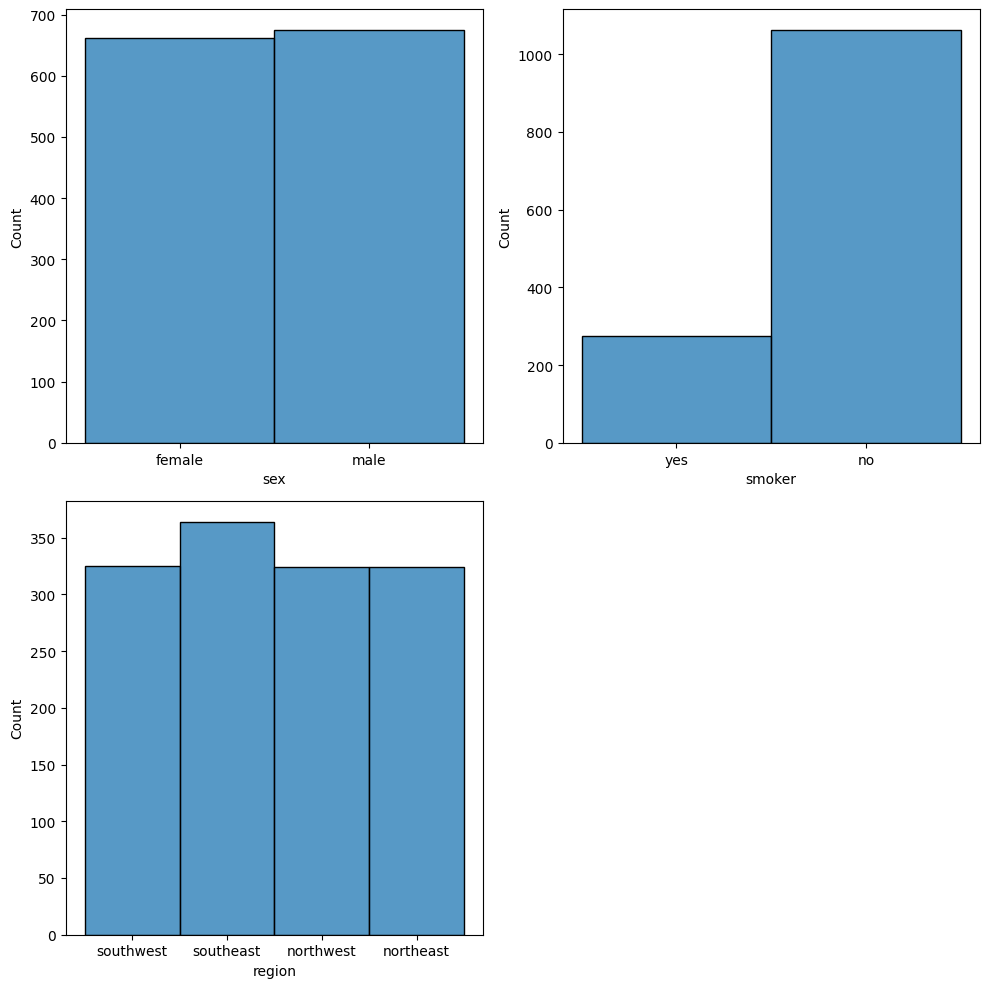

In [6]:
# Análisis Univariante 
    #Categorico

fig, axis = plt.subplots(2,2,figsize=(10,10))

#histogramas
sns.histplot(ax= axis[0,0],data=df,x='sex')
sns.histplot(ax= axis[0,1],data=df,x='smoker')
sns.histplot(ax= axis[1,0],data=df,x='region')


fig.delaxes(axis[1,1])
plt.tight_layout()
plt.show()

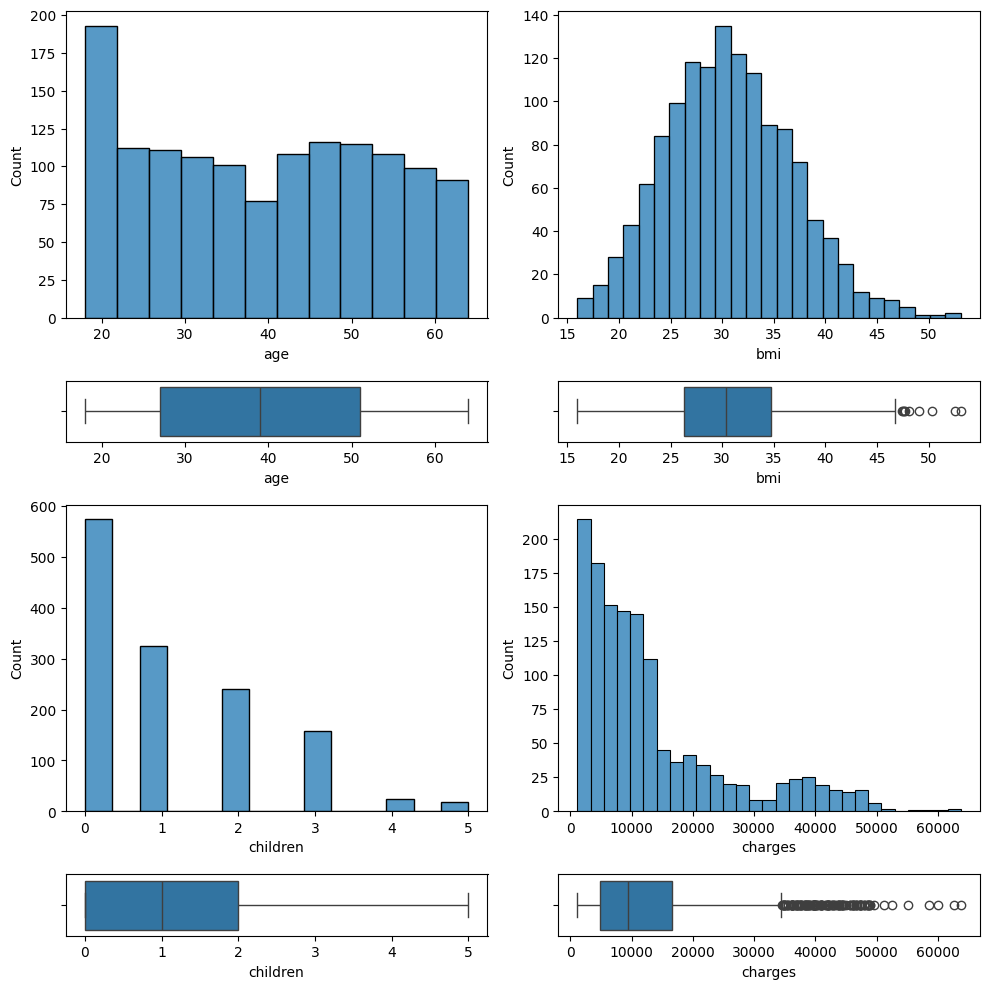

In [7]:
    # Númerico

fig, axis = plt.subplots(4,2,figsize=(10,10),gridspec_kw={"height_ratios":[5,1,5,1]}) 

sns.histplot(ax=axis[0,0],data=df,x='age')
sns.boxplot(ax=axis[1,0],data=df,x='age')

sns.histplot(ax=axis[0,1],data=df,x='bmi')
sns.boxplot(ax=axis[1,1],data=df,x='bmi')

sns.histplot(ax=axis[2,0],data=df,x='children')
sns.boxplot(ax=axis[3,0],data=df,x='children')

sns.histplot(ax=axis[2,1],data=df,x='charges')
sns.boxplot(ax=axis[3,1],data=df,x='charges')

plt.tight_layout()
plt.show()
            

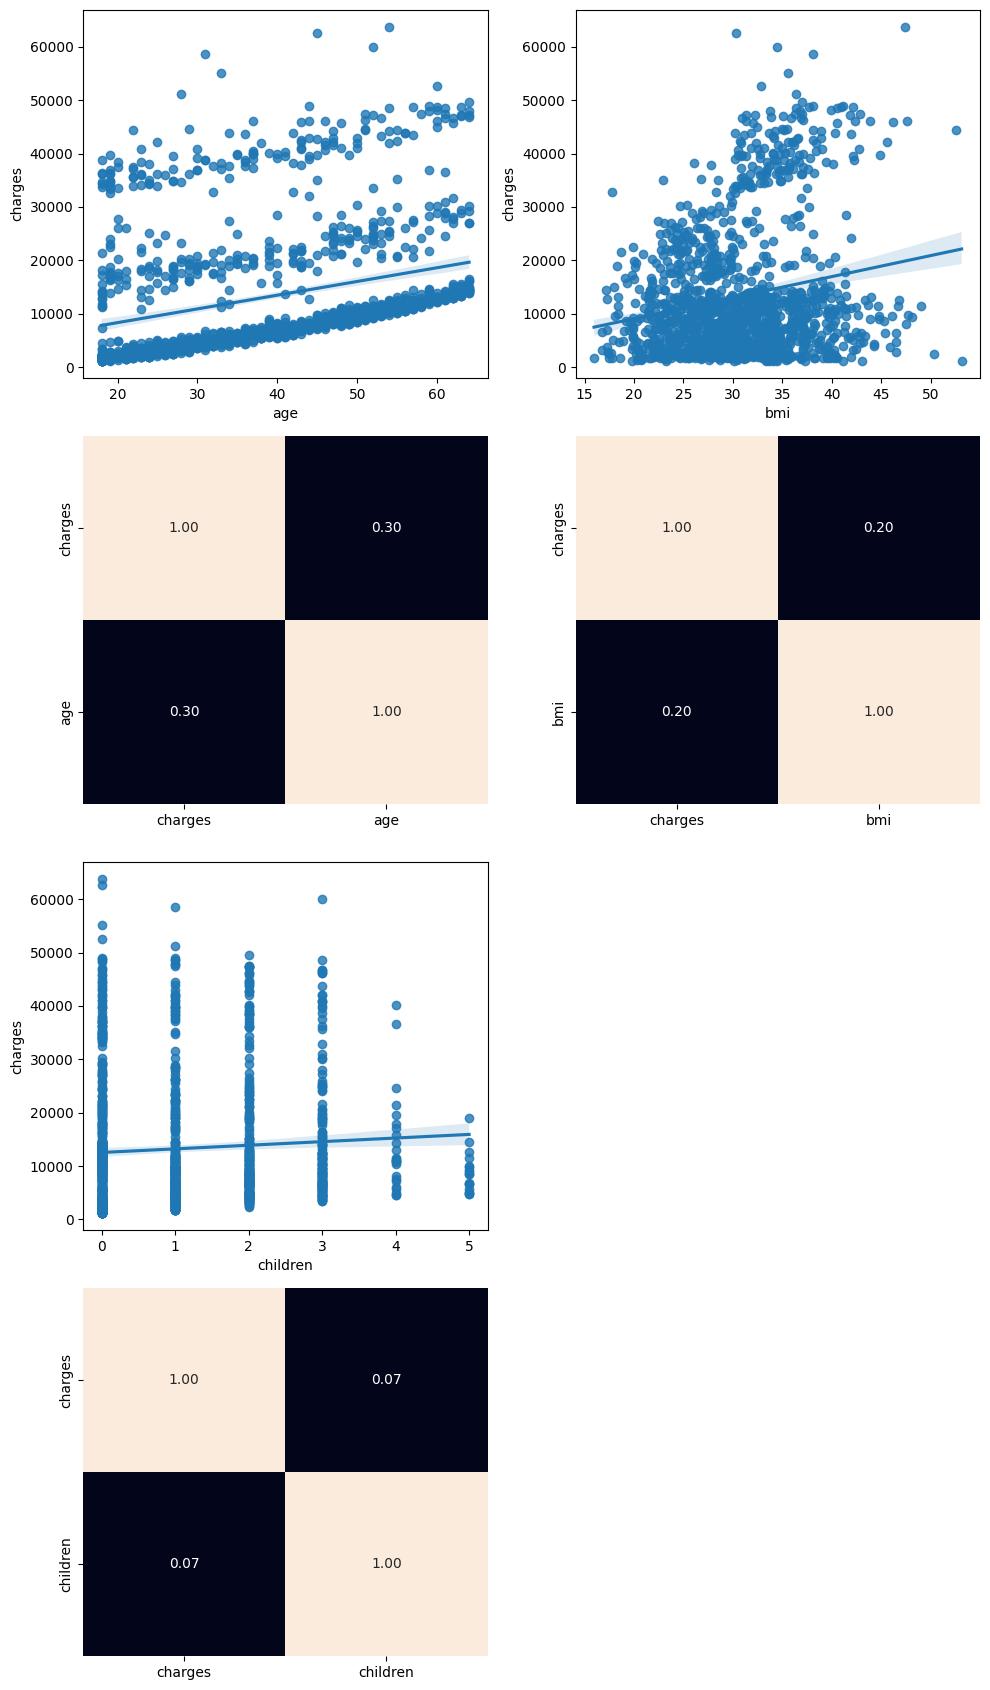

In [8]:
# Análisis Multivariante
    # Númerico - númerico

fig, axis = plt.subplots(4,2,figsize=(10,17))

sns.regplot(ax=axis[0,0], data=df, x="age", y="charges")
sns.heatmap(df[['charges','age']].corr(),annot=True,fmt='.2f',ax=axis[1,0],cbar=False)

sns.regplot(ax=axis[0,1], data=df, x="bmi", y="charges")
sns.heatmap(df[['charges','bmi']].corr(),annot=True,fmt='.2f',ax=axis[1,1],cbar=False)

sns.regplot(ax=axis[2,0], data=df, x="children", y="charges")
sns.heatmap(df[['charges','children']].corr(),annot=True,fmt='.2f',ax=axis[3,0],cbar=False)

fig.delaxes(axis[3,1])
fig.delaxes(axis[2,1])
plt.tight_layout()
plt.show()

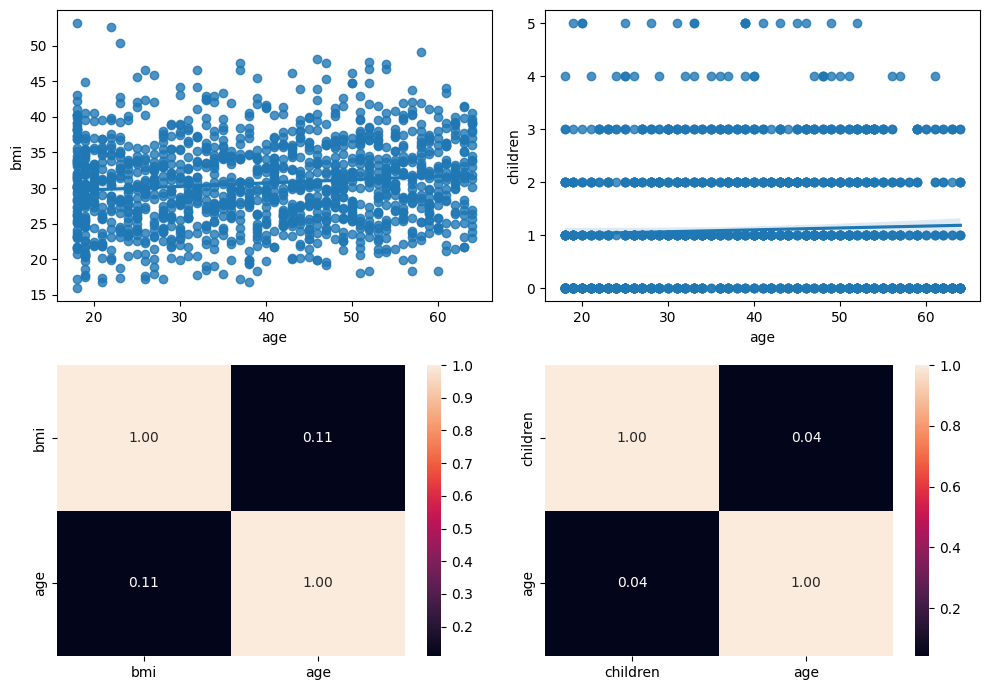

In [9]:
 # Comprobando correlaciones entre las predictoras

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0,0], data = df, x = "age", y = "bmi")
sns.heatmap(df[["bmi", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0])

sns.regplot(ax = axis[0,1], data = df, x = "age", y = "children")
sns.heatmap(df[["children", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1])


plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

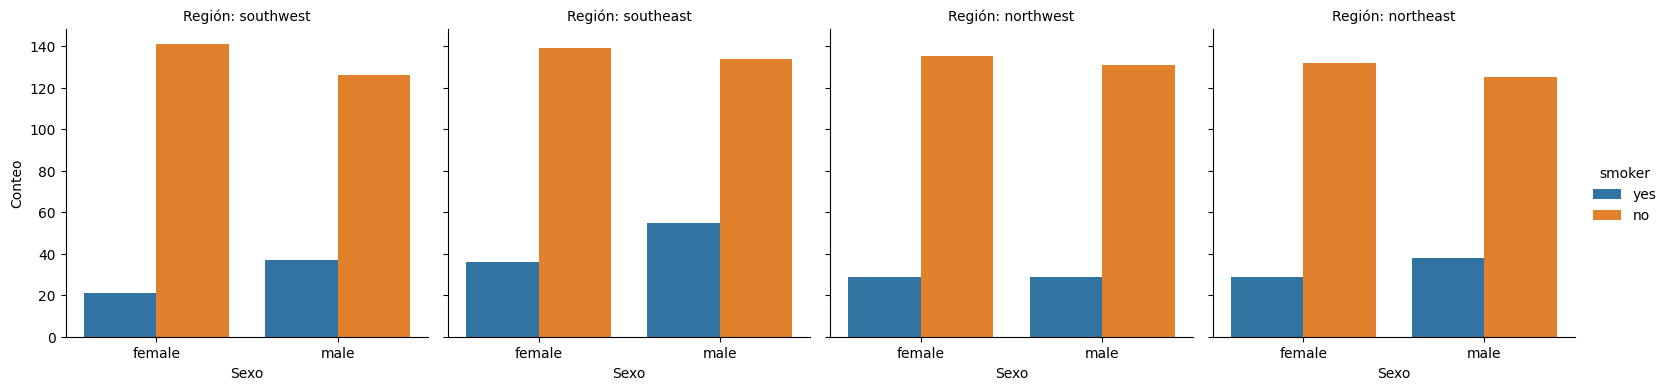

In [10]:
    #Análisis Categórico - Categórico

plt.figure(figsize=(10, 6))

g = sns.catplot(data=df, x='sex', hue='smoker', col='region', kind='count', height=4, aspect=1)
g.set_axis_labels('Sexo', 'Conteo')
g.set_titles(col_template='Región: {col_name}')
plt.show()



In [11]:
    # Factorización de variables cátegoricas

df['sex'] = pd.factorize(df['sex'])[0]
df['smoker'] = pd.factorize(df['smoker'])[0]
df['region'] = pd.factorize(df['region'])[0]


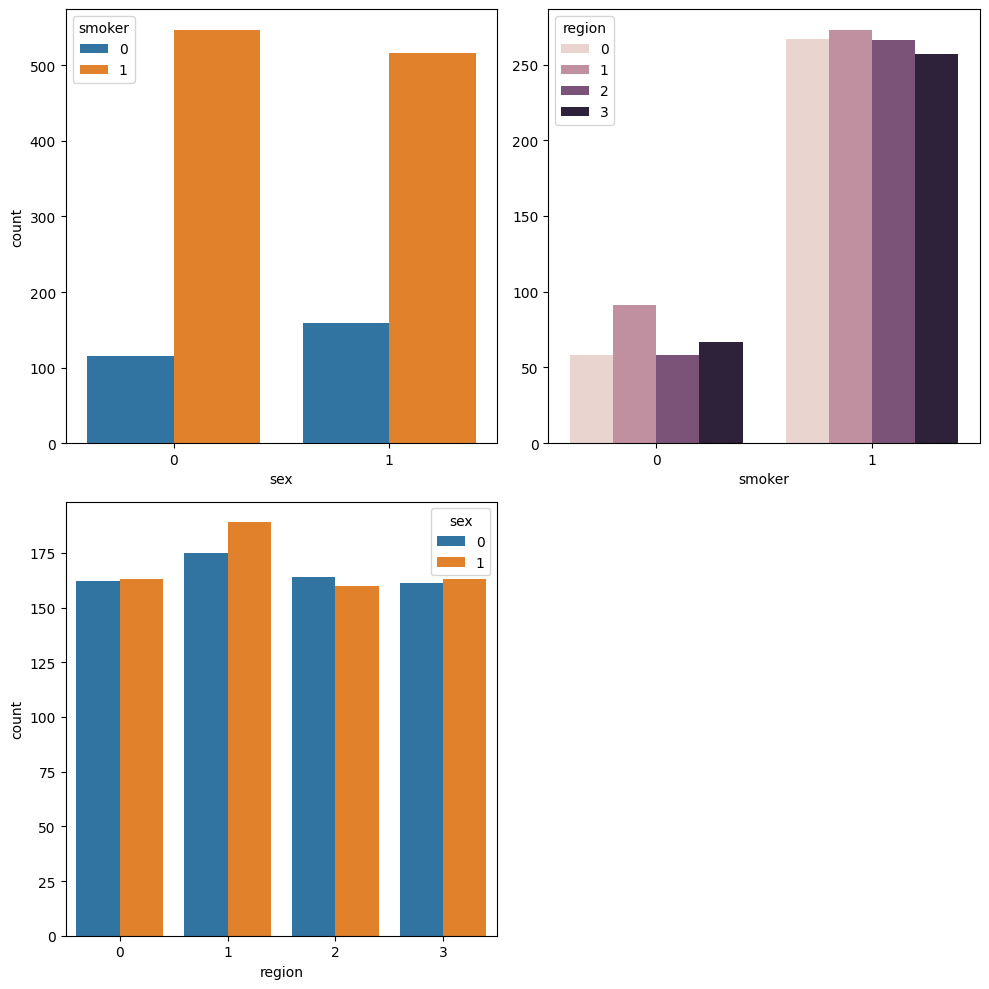

In [12]:
fig, axis = plt.subplots(2, 2, figsize = (10, 10))

sns.countplot(ax = axis[0, 0], data = df, x = "sex", hue = "smoker",)
sns.countplot(ax = axis[0, 1], data = df, x = "smoker", hue = "region").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = df, x = "region", hue = "sex")

fig.delaxes(axis[1, 1])
plt.tight_layout()
plt.show()

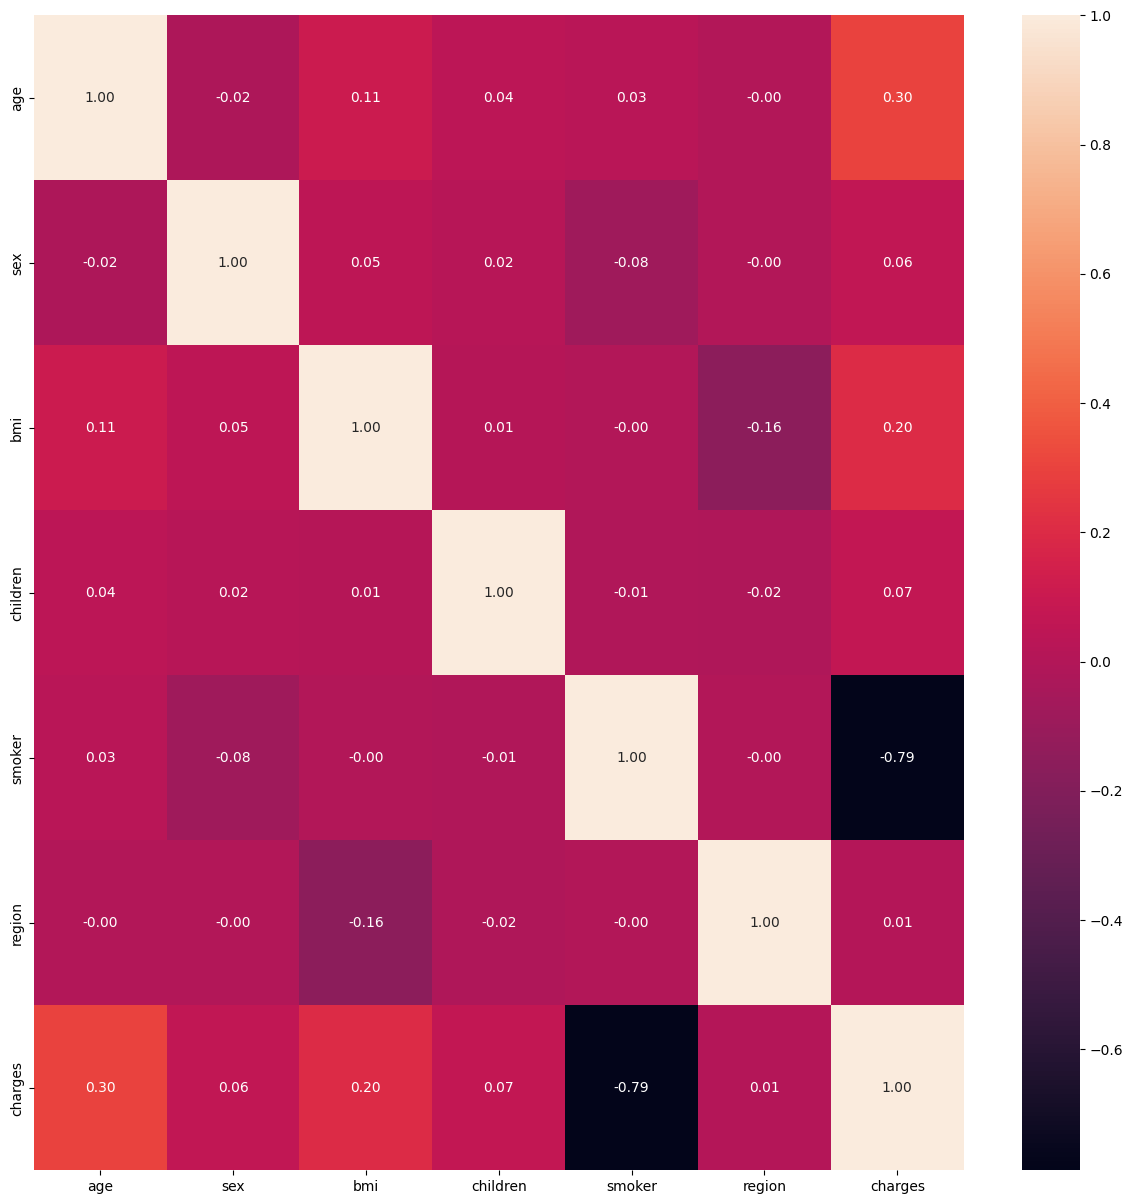

In [13]:
    #Análisis de todas las correlaciónes

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

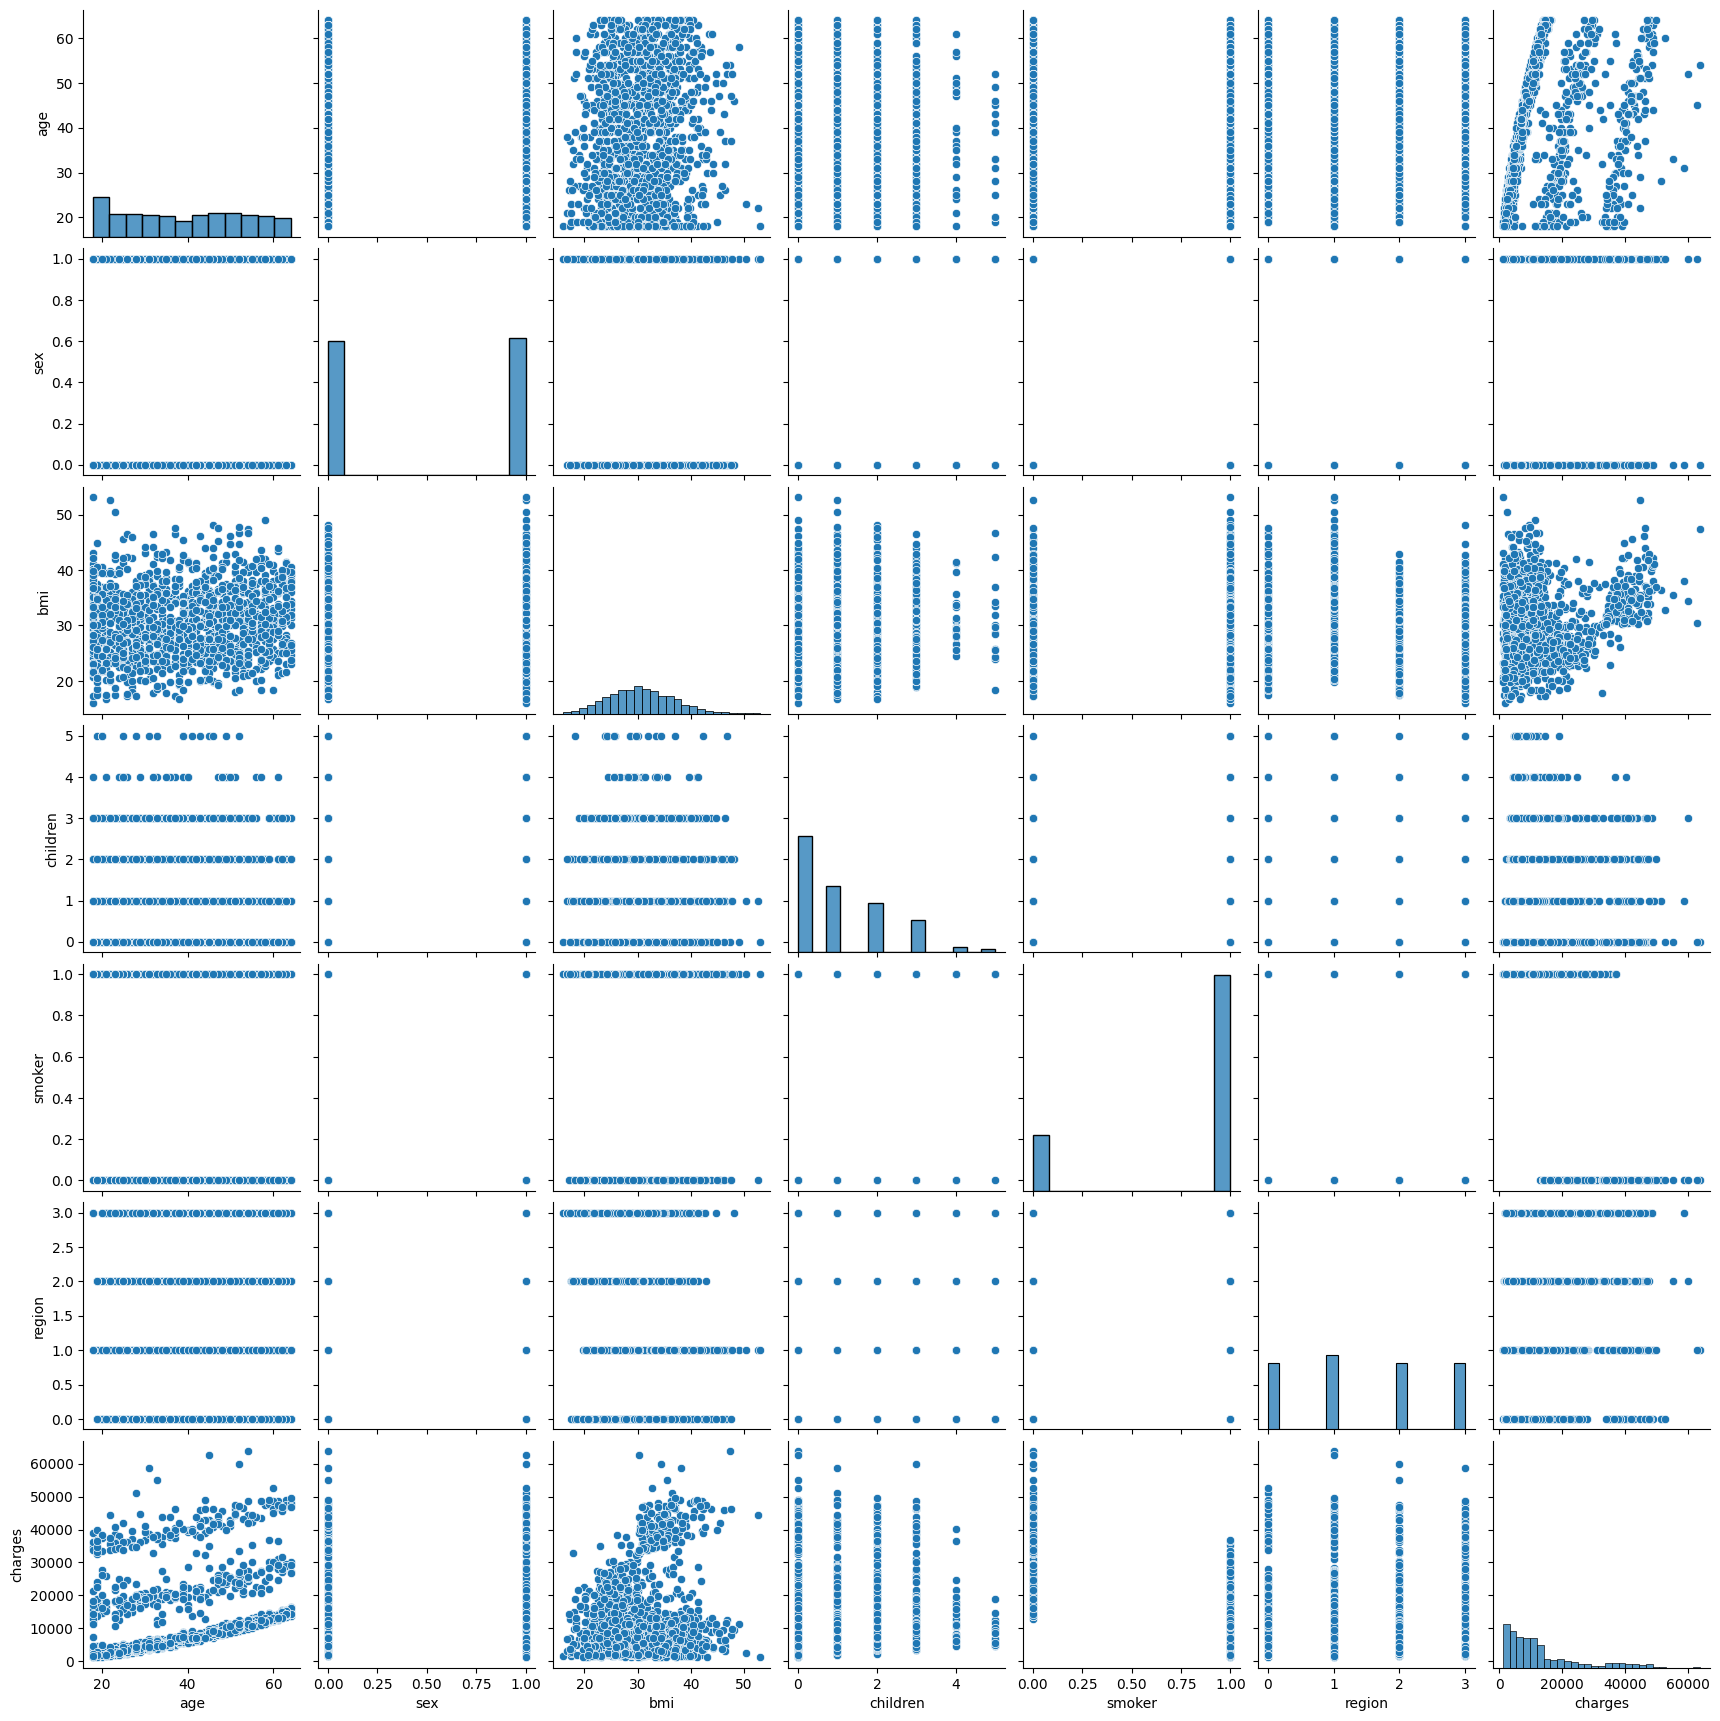

In [14]:
sns.pairplot(df)


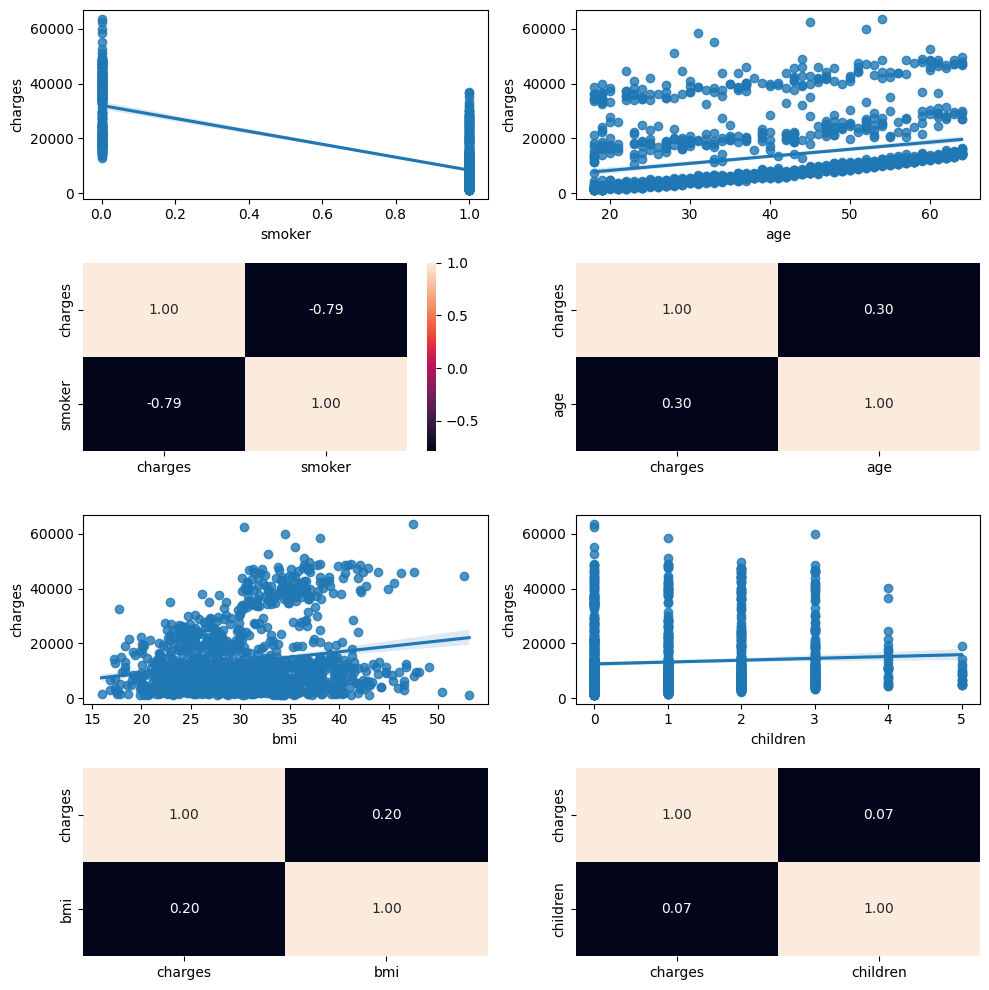

In [15]:
# Comprobación de Linealidad

fig, axis = plt.subplots(4,2,figsize=(10,10))

sns.regplot(ax=axis[0,0], data=df, x="smoker", y="charges")
sns.heatmap(df[['charges','smoker']].corr(),annot=True,fmt='.2f',ax=axis[1,0])

sns.regplot(ax=axis[0,1], data=df, x="age", y="charges")
sns.heatmap(df[['charges','age']].corr(),annot=True,fmt='.2f',ax=axis[1,1],cbar=False)

sns.regplot(ax=axis[2,0], data=df, x="bmi", y="charges")
sns.heatmap(df[['charges','bmi']].corr(),annot=True,fmt='.2f',ax=axis[3,0],cbar=False)

sns.regplot(ax=axis[2,1], data=df, x="children", y="charges")
sns.heatmap(df[['charges','children']].corr(),annot=True,fmt='.2f',ax=axis[3,1],cbar=False)

plt.tight_layout()
plt.show()

In [16]:
# Ingeniería de características

df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,1.483919,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,1.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,1.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


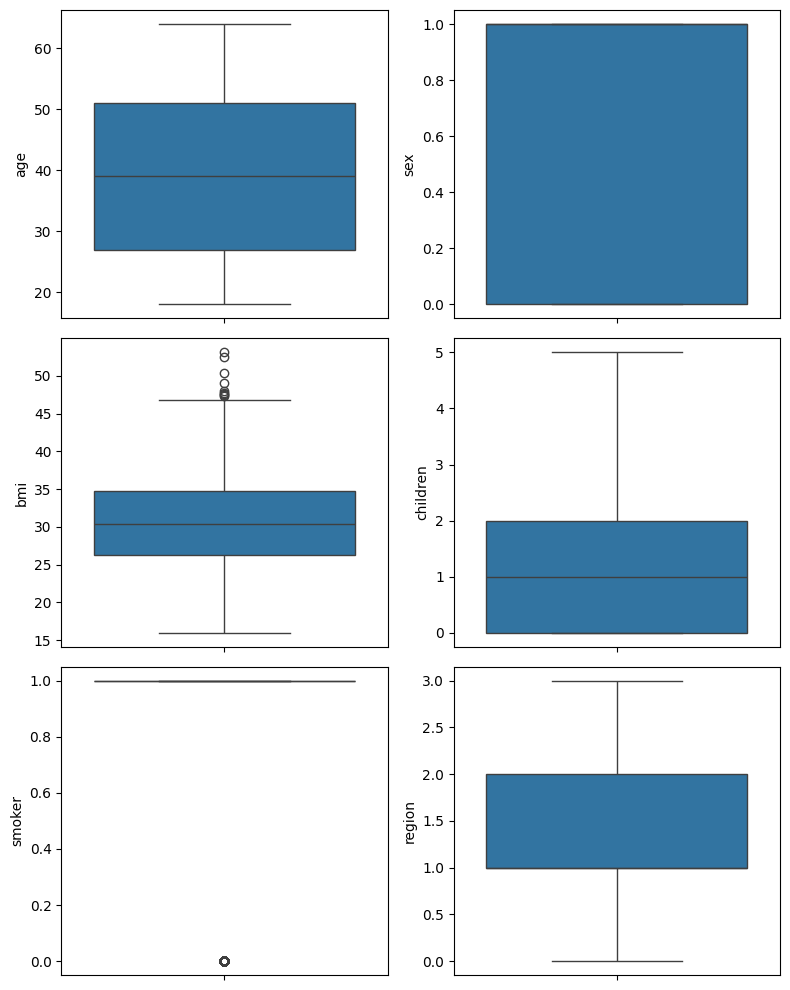

In [17]:
# Análisis de outliers

fig, axes =plt.subplots(3,2,figsize=(8,10))

sns.boxplot(ax=axes[0,0],data=df,y='age')
sns.boxplot(ax=axes[0,1],data=df,y='sex')
sns.boxplot(ax=axes[1,0],data=df,y='bmi')
sns.boxplot(ax=axes[1,1],data=df,y='children')
sns.boxplot(ax=axes[2,0],data=df,y='smoker')
sns.boxplot(ax=axes[2,1],data=df,y='region')

plt.tight_layout()
plt.show()

In [18]:
# Análisis Outliers en la variable 'bmi'

def analisis_ric(columna,df):
    estadisticas = df[columna].describe()
    ric = estadisticas['75%'] - estadisticas['25%']
    lim_sup = estadisticas['75%'] + 1.5*ric
    lim_inf = estadisticas['25%'] - 1.5*ric
    print(f'Rango Intercuratílico: {ric}')
    print(f'Límite superior: {lim_sup} \nLímite inferior: {lim_inf}')

analisis_ric('bmi',df)

Rango Intercuratílico: 8.410000000000004
Límite superior: 47.31500000000001 
Límite inferior: 13.674999999999994


In [19]:
print(df[df['bmi']>=47].count())
print(df[df['bmi']<13].count())

age         9
sex         9
bmi         9
children    9
smoker      9
region      9
charges     9
dtype: int64
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Nota:

Se decide eliminar los outliers sobre nuestro límite superios del Rango Intercuartílico.

In [20]:
df = df[df['bmi']<47]
print(df[df['bmi']>=47].count())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [21]:
# Comprobación de Nulos o Faltantes

df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Análisis:

Mejores Variables Predictoras: 

    Ya que se utilizará un Algórtimo de Regresión Líneal en este ejercicio, buscamos variables con una relación líneal directa con la variable objetivo.

    Tras realizar el EDA se eligen que las variables con mayor correlación con la variabre objetivo son: 'age', 'bmi' y 'smoker', además se considera que 'children'si bien no tiene una relación directa fuerte, puede ayudar en la predicción. 


In [22]:
df_eda = df[['age', 'bmi','children','smoker', 'charges']]
df_eda

,age,bmi,children,smoker,charges
0,19,27.900,0,0,16884.92400
1,18,33.770,1,1,1725.55230
2,28,33.000,3,1,4449.46200
3,33,22.705,0,1,21984.47061
4,32,28.880,0,1,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,1,10600.54830
1334,18,31.920,0,1,2205.98080
1335,18,36.850,0,1,1629.83350
1336,21,25.800,0,1,2007.94500


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler

# Separación características y objetivo

X = df_eda.drop(['charges'], axis=1)
y = df_eda['charges']

# División de train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Selección de características con SelectKBest (Ensayo y Error)

selector = SelectKBest(score_func=f_regression, k=3)
X_train_sel = selector.fit_transform(X_train, y_train)

# Transformación a los datos de test
X_test_sel = selector.transform(X_test)

# Obtener las columnas seleccionadas

selected_features = selector.get_support(indices=True)
best_columns = X.columns[selected_features]
print("Columnas seleccionadas:", best_columns)

# Escalar las características seleccionadas con MinMaxScaler

scaler = MinMaxScaler()
X_train_esc = scaler.fit_transform(X_train_sel) 
X_test_esc = scaler.transform(X_test_sel)  

Columnas seleccionadas: Index(['age', 'bmi', 'smoker'], dtype='object')


In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_esc,y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test_esc)

from sklearn.metrics import mean_squared_error, r2_score

print(f'Los coheficientes del modelo es: {model.coef_}')
print(f'El intercepto del modelo es: {model.intercept_}')
print(f'El MSE es: {mean_squared_error(y_pred,y_test)}')
print(f'El R2 es: {r2_score(y_pred,y_test)}')

Los coheficientes del modelo es: [ 12055.08701913  10057.10944867 -23765.27695741]
El intercepto del modelo es: 21723.67936384667
El MSE es: 34916425.2612677
El R2 es: 0.6867478448232911


Nota:

No se puede mejorar más este modelo debido a que carece de hiperparametros.

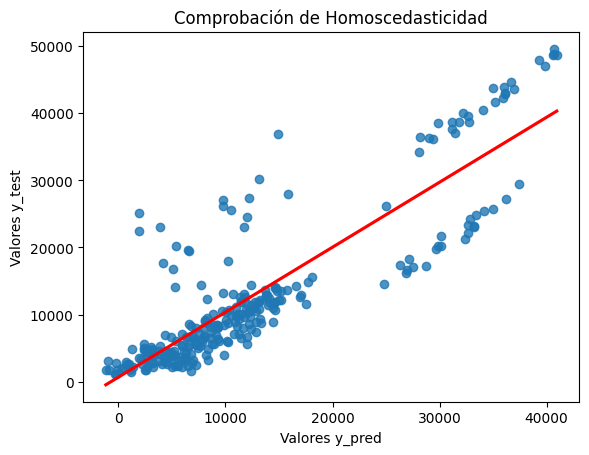

In [29]:
# Comprobación de Homoscedasticidad
sns.regplot(x=y_pred, y=y_test, line_kws={"color": "red"}, ci=None)


plt.xlabel('Valores y_pred')
plt.ylabel('Valores y_test')
plt.title('Comprobación de Homoscedasticidad')


plt.show()

Comprobación de cinco supuestos en los que se basa la Regresión Líneal: 


    Linealidad: Las variables seleccionadas tienen una relación lineal con el objetivo ('charges'), se observa en el gráfico de #Comprobación de Linealidad.

    Independencia: No hay filas duplicadas en el DataFrame. Ningún valor de cada muestra depende de olgún otro.

    Homoscedasticidad: La varianza entre las predicciones y los datos reales es constante, se puede definir entre dos lineas paralelas que contengan todos los puntos. se observa en el gráfico #Comprobación de Homoscedasticidad.

    Normalidad de los Errores: La mayoría de los errores se juntan en el promedio de la distancia de todos los errores (distribuyen normal), se observa en el gráfico #Comprobación de Homoscedasticidad.

    Ausencia de multicolinealidad: Las correlaciones entre las variables predictoras son muy bajas o nulas, se aprecia en los gráficos multivariantes hechos en el EDA